## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

Sun Dec 15 00:21:05 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.26       Driver Version: 430.26       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 106...  Off  | 00000000:01:00.0  On |                  N/A |
|  0%   46C    P0    32W / 120W |    765MiB /  3018MiB |      1%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.9300 - accuracy: 0.3048 - val_loss: 1.7573 - val_accuracy: 0.3739
Epoch 2/100
50000/50000 [==============================] - 2s 32us/step - loss: 1.7043 - accuracy: 0.3893 - val_loss: 1.6822 - val_accuracy: 0.3991
Epoch 3/100
50000/50000 [==============================] - 2s 32us/step - loss: 1.6104 - accuracy: 0.4272 - val_loss: 1.5769 - val_accuracy: 0.4359
Epoch 4/100
50000/50000 [==============================] - 2s 32us/step - loss: 1.5484 - accuracy: 0.4488 - val_loss: 1.5603 - val_accuracy: 0.4430
Epoch 5/100
50000/50000 [==============================] - 2s 32us/step - loss: 1.5071 - accuracy: 0.4618 - val_loss: 1.5187 - val_accuracy: 0.4568
Epoch 6/100
50000/50000 [==============================] - 2s 32us/step - loss: 1.4749 - accuracy: 0.4760 - val_loss: 1.5051 - val_accuracy: 0.4620
Epoch 7/100
50000/50000 [==============================] - 2s 

Epoch 56/100
50000/50000 [==============================] - 2s 32us/step - loss: 0.5674 - accuracy: 0.7988 - val_loss: 1.9382 - val_accuracy: 0.5156
Epoch 57/100
50000/50000 [==============================] - 2s 32us/step - loss: 0.5688 - accuracy: 0.7961 - val_loss: 1.9784 - val_accuracy: 0.5166
Epoch 58/100
50000/50000 [==============================] - 2s 31us/step - loss: 0.5421 - accuracy: 0.8059 - val_loss: 1.9565 - val_accuracy: 0.5144
Epoch 59/100
50000/50000 [==============================] - 2s 32us/step - loss: 0.5327 - accuracy: 0.8096 - val_loss: 2.0097 - val_accuracy: 0.5187
Epoch 60/100
50000/50000 [==============================] - 2s 32us/step - loss: 0.5220 - accuracy: 0.8152 - val_loss: 2.0435 - val_accuracy: 0.5169
Epoch 61/100
50000/50000 [==============================] - 2s 32us/step - loss: 0.5365 - accuracy: 0.8080 - val_loss: 2.0256 - val_accuracy: 0.5094
Epoch 62/100
50000/50000 [==============================] - 2s 32us/step - loss: 0.5147 - accuracy: 0.8165

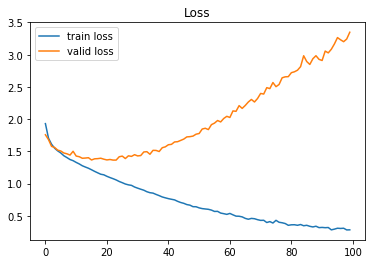

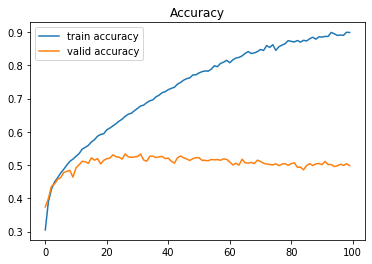

In [13]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

Q: 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度
> ＡＮＳ：　訓練時間少了１／２～２／３